Given

$f(x, y) = 20 + \sum_{i=1}^{2}[(x_i + 1)^2 - 10\cos{(\frac{\pi x_i}{2})}]$

$\nabla f(\vec{x}) = \begin{bmatrix} 2x + 5 \pi \sin{(\frac{\pi x}{2})} + 2 \\ 2y + 5 \pi \sin{(\frac{\pi y}{2})} + 2 \end{bmatrix}$

For $I = [-\frac{1}{2}, \frac{1}{2}]$ and $f: I \times I \mapsto R$,

the local optimum was found at $\vec{x} = \begin{bmatrix} -0.07514062278679581 \\ -0.07514062278679577 \end{bmatrix}$

after 1,000 trials with a value of $1.8498803368195986$




Starting gradient descent at: (-0.5, 0.5) with alpha = 0.01 1000 trials.

End location reached: (-0.07514062278679581, -0.07514062278679577)
F(end location): 1.8498803368195986


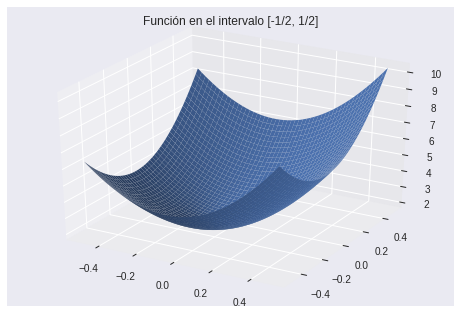

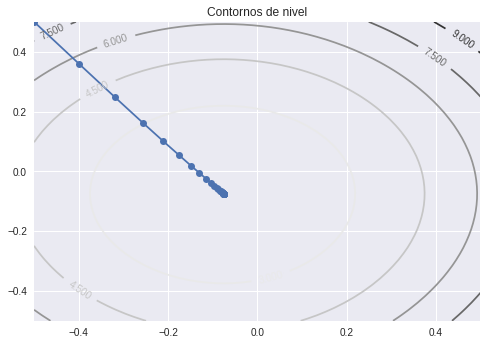

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from scipy.spatial import distance "No era necesario scipy"


RANGE = (-.5, .5)
X_STARTING_POINT = (-.5, .5)
ALPHA = .01
TRIALS = 1000
DEBUG = False  # Print new location on each step


# Define f: IxI -> R
def f(x, y):
  s = 0
  for i in [x, y]:
    left = (i + 1) ** 2
    div = (np.pi * i) / 2
    right = 10 * np.cos(div)
    s += (left - right)
  return 20 + s

# Return gradient vector
def df(x, y):
  r = []
  for i in [x, y]:
    r.append(
        (2*i) +
        (
            5 *
            np.pi *
            np.sin(
              (np.pi * i) / 2
            )
        ) +
        2
    )
  return r

# Gradient descent
def gradient_descent(location, alpha, trials=100, debug=False):
  """Given a x starting point, an aplha value and a function, compute the descent."""
  print("Starting gradient descent at: {} with alpha = {} {} trials.".format(location, alpha, trials))
  last_location = location
  diff = 1
  X, Y = [], []
  """Aqui falto comparar tu gradiente con un epsilon, esto sirve para poder detenerte antes de todas las 
  iteraciones"""
  for i in range(trials):
    X.append(location[0])
    Y.append(location[1])
    last_location = location
    location -= alpha * np.array(df(*last_location))
    if debug:
      print("\tNew location obtained:", location, "=>", f(*location))
      print(distance.euclidean(location, last_location))

  return X, Y


# Compute Z values
X, Y = np.linspace(*RANGE), np.linspace(*RANGE)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

# Function values plot
values_fig = plt.figure("Values")
values_ax = values_fig.add_subplot(111, projection='3d')
values_ax.plot_surface(X, Y , Z)
values_ax.set_title('Función en el intervalo [-1/2, 1/2]')


# Contourn plot
fix, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Contornos de nivel')

# Apply gradient descent
X, Y = gradient_descent(X_STARTING_POINT, ALPHA, trials=TRIALS, debug=DEBUG)
last_location = (X[-1], Y[-1])
ax.plot(X, Y, marker='o')
print("\nEnd location reached:", last_location)
print("F(end location):", f(*last_location))